# Crops Nutrients and Conditional Analysis

### Uploading the Dataset
Kaggle link to the dataset - [here](https://drive.google.com/file/d/1sigalnxBzH22_pyfAbxh_sHCzjBnN3NE/view?usp=sharing)

In [1]:
from google.colab import files 
files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


{'Crop_recommendation.csv': b'N,P,K,temperature,humidity,ph,rainfall,label\r\n90,42,43,20.87974371,82.00274423,6.502985292000001,202.9355362,rice\r\n85,58,41,21.77046169,80.31964408,7.038096361,226.6555374,rice\r\n60,55,44,23.00445915,82.3207629,7.840207144,263.9642476,rice\r\n74,35,40,26.49109635,80.15836264,6.980400905,242.8640342,rice\r\n78,42,42,20.13017482,81.60487287,7.628472891,262.7173405,rice\r\n69,37,42,23.05804872,83.37011772,7.073453503,251.0549998,rice\r\n69,55,38,22.70883798,82.63941394,5.70080568,271.3248604,rice\r\n94,53,40,20.27774362,82.89408619,5.718627177999999,241.9741949,rice\r\n89,54,38,24.51588066,83.53521629999999,6.685346424,230.4462359,rice\r\n68,58,38,23.22397386,83.03322691,6.336253525,221.2091958,rice\r\n91,53,40,26.52723513,81.41753846,5.386167788,264.6148697,rice\r\n90,46,42,23.97898217,81.45061596,7.50283396,250.0832336,rice\r\n78,58,44,26.80079604,80.88684822,5.108681786,284.4364567,rice\r\n93,56,36,24.01497622,82.05687182,6.98435366,185.2773389,rice\r

### Data Visualization and Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df = pd.read_csv('/content/Crop_recommendation.csv')
df = df.rename(columns={'rainfall': 'water'})
df.head()

,N,P,K,temperature,humidity,ph,water,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   water        2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
# All unique crops
crops = df['label'].unique()
crops

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

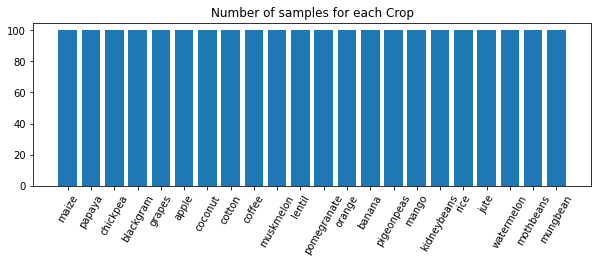

In [6]:
# Checking for samples per crop
samples_per_crop = df['label'].value_counts()
plt.figure(figsize = [10,3])
plt.title("Number of samples for each Crop")
plt.bar(list(samples_per_crop.keys()), samples_per_crop)
plt.xticks(range(len(samples_per_crop)), list(samples_per_crop.keys()), rotation=60)
plt.show()

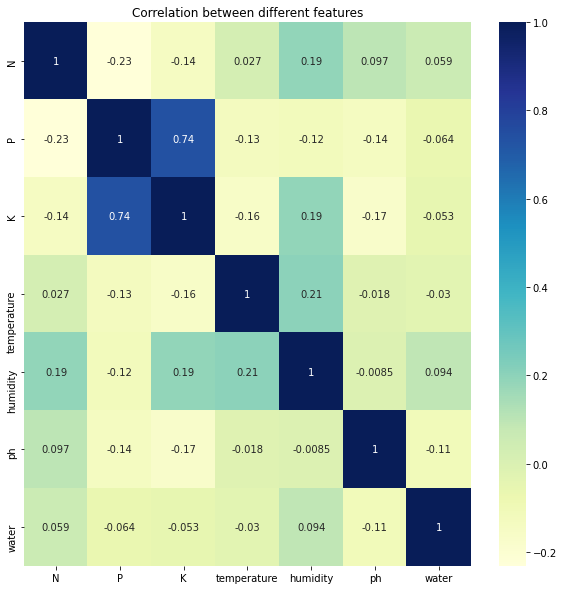

In [7]:
# Correlation Heatmap
plt.figure(figsize=(10, 10))
plt.title("Correlation between different features")
correlation = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Preprocessing the Data

In [8]:
df['water'] = df['water']/4

In [9]:
# One hot encoding the labels column
one_hot = pd.get_dummies(df.label)
df1 = pd.concat([df, one_hot], axis=1)
df1 = df1.drop(labels='label',axis = 1)
df1

,N,P,K,temperature,humidity,ph,water,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,lentil,maize,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,90,42,43,20.879744,82.002744,6.502985,50.733884,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,85,58,41,21.770462,80.319644,7.038096,56.663884,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,60,55,44,23.004459,82.320763,7.840207,65.991062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,74,35,40,26.491096,80.158363,6.980401,60.716009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,78,42,42,20.130175,81.604873,7.628473,65.679335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,44.443627,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2196,99,15,27,27.417112,56.636362,6.086922,31.981153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2197,118,33,30,24.131797,67.225123,6.362608,43.330710,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2198,117,32,34,26.272418,52.127394,6.758793,31.793823,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Training the model

In [17]:
# Training the model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

target = ['N','P','K']
features = ['temperature', 'humidity', 'ph', 'water',
            'rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
            'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
            'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
            'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

X = df1[features]
y = df1[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

model1 = LinearRegression()
model1.fit(X_train, y_train)
model2 = RandomForestRegressor(n_estimators=50)
model2.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

print("R2 Score of the trained multi-target linear regression model: ", metrics.r2_score(y_test,y_pred1))
print("R2 Score of the trained multi-target random forest regression model: ", metrics.r2_score(y_test,y_pred2))


R2 Score of the trained multi-target linear regression model:  0.9462916268606346
R2 Score of the trained multi-target random forest regression model:  0.9393042037738083


### User Interface Code

In [20]:
# UI to input envionment parameters and crop and get the ideal nutrient composition
def recommend():
  crop = input("Crop type : ")
  env_temp = input("Environment Temperature : ")
  env_humidity = input("Environment Humidity : ")
  env_ph = input("Environment pH : ")
  env_rainfall = input("Environment Rainfall : ")
  get_recomm(crop,env_temp,env_humidity,env_ph,env_rainfall)

def get_recomm(model, crop,env_temp,env_humidity,env_ph,env_rainfall):
  # one hot encode crop
  crops = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
           'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
           'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
           'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

  crop_encoding = [0]*len(crops)

  for indx in range(len(crops)):
    if crops[indx]==crop:
      crop_encoding[indx] = 1
      break

  features = np.array([env_temp,env_humidity,env_ph,env_rainfall] + crop_encoding).reshape(1,-1)
  nutrients = model.predict(features)[0]
  print("Optimal concentrations of\nN =",nutrients[0], "\nP =",nutrients[1], "\nK =",nutrients[2])
  return nutrients

### Testing

In [22]:
nutrients = get_recomm(model1, 'rice', 35,60,6.5,50)

Optimal concentrations of
N = 80.12908935546875 
P = 48.47650146484375 
K = 39.9139404296875


In [ ]:
import pickle

pickle.dump(model, open('Nutrient_model.sav', 'wb'))

In [ ]:
model1 = pickle.load(open('Nutrient_model.sav', 'rb'))

In [ ]:
nutrients = get_recomm('pigeonpeas',28,66.5,4.7,145)

Optimal concentrations of
N = 17.820831298828125 
P = 66.17181396484375 
K = 19.19414520263672
